In [95]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

In [97]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 데이터 생성
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=5, probability=True)
knn.fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)[:, 1]

# ROC 곡선과 AUC 계산
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Precision-Recall 곡선
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# 서브플롯 생성
fig = make_subplots(rows=1, cols=2, subplot_titles=("ROC Curve", "Precision-Recall Curve"))

# ROC 곡선 추가
fig.add_trace(
    go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve (AUC = {:.2f})'.format(roc_auc)),
    row=1, col=1
)

# Precision-Recall 곡선 추가
fig.add_trace(
    go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall Curve'),
    row=1, col=2
)

# 레이아웃 업데이트
fig.update_layout(title_text='KNN Classifier Probability Analysis', showlegend=True)

# 그래프 출력
fig.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [3]:
df = make_moons()
df

(array([[-8.01413622e-01,  5.98110530e-01],
        [ 9.60230259e-02,  9.95379113e-01],
        [ 9.91790014e-01,  1.27877162e-01],
        [ 3.45365054e-01,  9.38468422e-01],
        [ 1.92691676e+00,  1.24732995e-01],
        [ 3.27051370e-02,  2.46345416e-01],
        [ 9.67948422e-01, -4.99486216e-01],
        [ 3.20515776e-02,  9.99486216e-01],
        [ 9.00968868e-01,  4.33883739e-01],
        [ 1.76144596e+00, -1.48228395e-01],
        [ 2.00000000e+00,  5.00000000e-01],
        [ 1.61911895e-01, -4.55349012e-02],
        [ 1.84408430e-02,  3.08841371e-01],
        [ 1.09602303e+00, -4.95379113e-01],
        [ 1.40478334e+00, -4.14412623e-01],
        [ 8.01413622e-01,  5.98110530e-01],
        [-9.81559157e-01,  1.91158629e-01],
        [ 4.04783343e-01,  9.14412623e-01],
        [ 1.28681296e-01,  9.28244800e-03],
        [ 9.90311321e-02,  6.61162609e-02],
        [ 2.84527587e-01,  9.58667853e-01],
        [ 1.87131870e+00,  9.28244800e-03],
        [ 1.51839257e+00, -3.551

In [4]:
import pandas as pd
knn_df = pd.read_csv('KNN_totalData.csv')
knn_df

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),강수량(mm),평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
0,31.4,35.8,28.7,55.0,0.0,3.9,6.3,남동풍,0.0,0.0,0.0180,0.0150,0.20,0.0050
1,26.5,30.5,24.1,87.6,13.0,4.2,7.0,북동풍,0.0,0.0,0.0170,0.0140,0.20,0.0050
2,26.4,29.6,24.7,93.0,6.5,2.1,4.7,남서풍,0.0,0.0,0.0150,0.0210,0.30,0.0050
3,26.6,29.2,25.0,87.5,0.0,3.2,4.8,남서풍,1.0,1.0,0.0290,0.0180,0.40,0.0060
4,24.4,26.2,22.5,92.4,10.5,2.2,4.9,남서풍,1.0,1.0,0.0250,0.0310,0.40,0.0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,1.5,6.8,-2.8,76.6,0.0,1.4,3.0,북동풍,1.0,2.0,0.0075,0.0519,0.95,0.0028
9947,1.2,4.4,-1.7,69.5,0.0,1.6,4.7,북서풍,1.0,2.0,0.0074,0.0466,0.90,0.0028
9948,1.3,4.6,-1.5,71.0,0.0,1.7,3.3,서풍,1.0,1.0,0.0079,0.0435,0.87,0.0024
9949,0.6,2.1,-0.9,92.0,13.1,2.6,4.6,북동풍,1.0,2.0,0.0056,0.0403,0.84,0.0020


In [12]:
good = (knn_df['최대풍속풍향(deg)'] == '북동풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '0'

good = (knn_df['최대풍속풍향(deg)'] == '동풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '1'

good = (knn_df['최대풍속풍향(deg)'] == '남동풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '2'

good = (knn_df['최대풍속풍향(deg)'] == '남풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '3'

good = (knn_df['최대풍속풍향(deg)'] == '남서풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '4'

good = (knn_df['최대풍속풍향(deg)'] == '서풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '5'

good = (knn_df['최대풍속풍향(deg)'] == '북서풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '6'

good = (knn_df['최대풍속풍향(deg)'] == '북풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '7'

knn_df['최대풍속풍향(deg)'] = knn_df['최대풍속풍향(deg)'].astype(str)

In [13]:
good = (knn_df['최대풍속풍향(deg)'] == '0.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '북동풍'

good = (knn_df['최대풍속풍향(deg)'] == '1.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '동풍'

good = (knn_df['최대풍속풍향(deg)'] == '2.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '남동풍'

good = (knn_df['최대풍속풍향(deg)'] == '3.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '남풍'

good = (knn_df['최대풍속풍향(deg)'] == '4.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '남서풍'

good = (knn_df['최대풍속풍향(deg)'] == '5.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '서풍'

good = (knn_df['최대풍속풍향(deg)'] == '6.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '북서풍'

good = (knn_df['최대풍속풍향(deg)'] == '7.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '북풍'

In [14]:
knn_df

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),강수량(mm),평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
0,31.4,35.8,28.7,55.0,0.0,3.9,6.3,2,0.0,0.0,0.0180,0.0150,0.20,0.0050
1,26.5,30.5,24.1,87.6,13.0,4.2,7.0,0,0.0,0.0,0.0170,0.0140,0.20,0.0050
2,26.4,29.6,24.7,93.0,6.5,2.1,4.7,4,0.0,0.0,0.0150,0.0210,0.30,0.0050
3,26.6,29.2,25.0,87.5,0.0,3.2,4.8,4,1.0,1.0,0.0290,0.0180,0.40,0.0060
4,24.4,26.2,22.5,92.4,10.5,2.2,4.9,4,1.0,1.0,0.0250,0.0310,0.40,0.0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,1.5,6.8,-2.8,76.6,0.0,1.4,3.0,0,1.0,2.0,0.0075,0.0519,0.95,0.0028
9947,1.2,4.4,-1.7,69.5,0.0,1.6,4.7,6,1.0,2.0,0.0074,0.0466,0.90,0.0028
9948,1.3,4.6,-1.5,71.0,0.0,1.7,3.3,5,1.0,1.0,0.0079,0.0435,0.87,0.0024
9949,0.6,2.1,-0.9,92.0,13.1,2.6,4.6,0,1.0,2.0,0.0056,0.0403,0.84,0.0020


<Axes: xlabel='PM10', ylabel='count'>

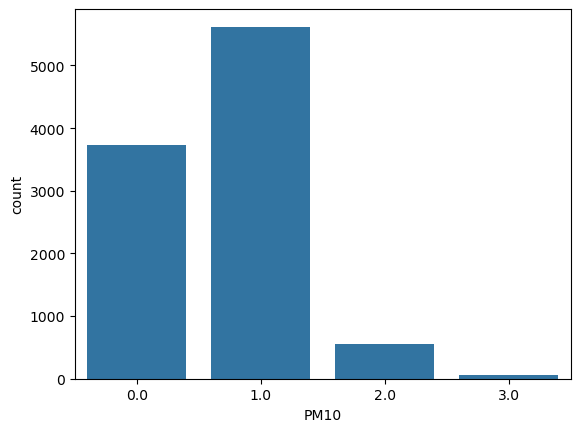

In [15]:
import seaborn as sns
sns.barplot(x=knn_df['PM10'].value_counts().index, y=knn_df['PM10'].value_counts())

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X = knn_df.drop('PM10', axis=1)
y = knn_df['PM10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pm10_std_scaler = StandardScaler()
pm10_std_scaler.fit(X_train)
pm10_tstd_scaler = StandardScaler()
pm10_tstd_scaler.fit(X_test)

pm10_scaled_df = pm10_std_scaler.transform(X_train)
pm10_scaled_tdf = pm10_tstd_scaler.transform(X_test)

In [20]:
model = KNeighborsClassifier()
model.fit(pm10_scaled_df, y_train)

pred_pm10 = model.predict(pm10_scaled_tdf)

In [54]:
rdf = pd.DataFrame({
    '예측': pred_pm10.tolist(),
    '실제': y_test.tolist()
})

In [55]:
rdf.loc[rdf['예측'] != rdf['실제'], :]

,예측,실제
12,1.0,0.0
13,1.0,0.0
14,1.0,3.0
23,1.0,0.0
25,1.0,0.0
...,...,...
1944,0.0,1.0
1953,0.0,1.0
1954,1.0,0.0
1977,0.0,2.0


In [46]:
rdf = rdf.rename(columns={'index.1' : 'index'})
rdf

,index,예측,실제
0,0,0.0,0.0
1,1,0.0,0.0
2,2,1.0,1.0
3,3,1.0,1.0
4,4,0.0,0.0
...,...,...,...
1986,1986,0.0,0.0
1987,1987,1.0,1.0
1988,1988,0.0,0.0
1989,1989,1.0,1.0


In [98]:
import pandas as pd
import plotly.graph_objects as go

# 데이터 생성
test_dic = {
    "real": [0, 2, 4, 2, 3, 1, 4, 2, 1, 3, 1, 2, 0],
    "pred": [1, 2, 4, 2, 2, 3, 1, 0, 1, 2, 3, 2, 1]
}

# 데이터프레임으로 변환
df = pd.DataFrame(test_dic)

# 실제 값(trace1)과 예측 값(trace2)을 시각화
trace1 = go.Scatter(
    x=df.index,
    y=df['real'],
    mode='lines+markers',
    name='Real',
    marker=dict(size=10),
    zorder=2  # zorder 설정 (높을수록 위에 그려짐)
)

trace2 = go.Scatter(
    x=df.index,
    y=df['pred'],
    mode='lines+markers',
    name='Pred',
    marker=dict(size=10),
    zorder=1  # zorder 설정
)

# 레이아웃 설정
layout = go.Layout(
    title='Real vs Predicted Values',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Figure 생성
fig = go.Figure(data=[trace1, trace2], layout=layout)

# 그래프 출력
fig.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   real    7 non-null      int64
 1   pred    7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [120]:
rdf = rdf.astype('int')
rdf.info()
trdf = rdf.copy()
trdf.to_csv('predKNN_Chart.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   예측      1991 non-null   int32
 1   실제      1991 non-null   int32
dtypes: int32(2)
memory usage: 15.7 KB


In [122]:
df = pd.read_csv('predKNN_Chart.csv')
df

,예측,실제
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
1986,0,0
1987,1,1
1988,0,0
1989,1,1


In [123]:
import pandas as pd
import plotly.graph_objects as go


# 데이터프레임으로 변환
df = pd.read_csv('predKNN_Chart.csv')

# 실제 값(trace1)과 예측 값(trace2)을 시각화
trace1 = go.Scatter(
    x=df.index,
    y=df['실제'],
    mode='lines+markers',
    name='Real',
    marker=dict(size=10),
    zorder=2  # zorder 설정 (높을수록 위에 그려짐)
)

trace2 = go.Scatter(
    x=df.index,
    y=df['예측'],
    mode='lines+markers',
    name='Pred',
    marker=dict(size=10),
    zorder=1  # zorder 설정
)

# 레이아웃 설정
layout = go.Layout(
    title='Real vs Predicted Values(적중률 : 84%)',
    xaxis=dict(
        title='Index',
        tickmode='linear',
        dtick=100,  # X축을 100 단위로 설정
        range=[0, 100],  # 초기 줌 설정
        rangeslider=dict(
            visible=True  # 가로 슬라이드바 활성화
        )
    ),
    yaxis=dict(title='Value')
)

# Figure 생성
fig = go.Figure(data=[trace1, trace2], layout=layout)

# 그래프 출력
fig.show()

In [116]:
import pandas as pd
import plotly.graph_objects as go

# 데이터프레임으로 변환
df = trdf

# 실제 값(trace1)과 예측 값(trace2)을 시각화
trace1 = go.Scatter(
    x=df.index,
    y=df['실제'],
    mode='lines+markers',
    name='Real',
    marker=dict(size=10),
    zorder=2  # zorder 설정 (높을수록 위에 그려짐)
)

trace2 = go.Scatter(
    x=df.index,
    y=df['예측'],
    mode='lines+markers',
    name='Pred',
    marker=dict(size=10),
    zorder=1  # zorder 설정
)

# 레이아웃 설정
layout = go.Layout(
    title='Real vs Predicted Values(적중률 : 84%)',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Figure 생성
fig = go.Figure(data=[trace1, trace2], layout=layout)
# fig = go.Figure(data=[trace1], layout=layout)

# 그래프 출력
fig.show()

In [37]:
import plotly.graph_objects as go
import plotly.data as data



,예측,실제
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1986,0.0,0.0
1987,1.0,1.0
1988,0.0,0.0
1989,1.0,1.0


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_pm10)

0.8412857860371673

In [24]:
score=[]
# 하이퍼 파라미터 튜닝
for i in range(1, 143):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(pm10_scaled_df, y_train)
    pred = knn.predict(pm10_scaled_tdf)
    score.append(accuracy_score(y_test, pred))

In [25]:
result = pd.DataFrame(
    {
        'n' : [i for i in range(1, 143)],
        'score' : score
    }
)
result

,n,score
0,1,0.831241
1,2,0.799096
2,3,0.831743
3,4,0.823204
4,5,0.841286
...,...,...
137,138,0.805625
138,139,0.805625
139,140,0.805625
140,141,0.805123


<Axes: xlabel='n', ylabel='score'>

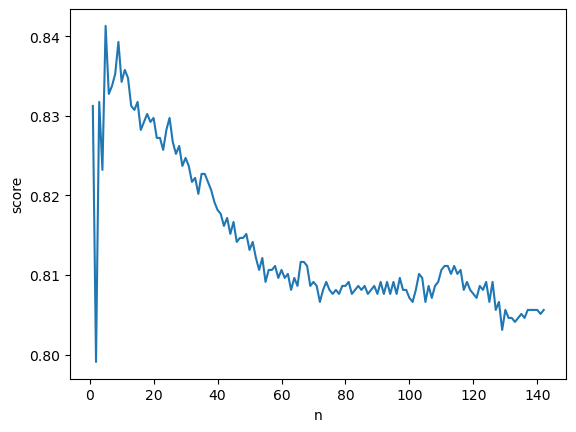

In [26]:
sns.lineplot(x=result['n'], y=result['score'])

In [27]:
result.loc[result['score'] == result['score'].max(), :]

,n,score
4,5,0.841286


In [32]:
knn_df = pd.read_csv('KNN_totalData.csv')
knn_df

good = (knn_df['최대풍속풍향(deg)'] == '북동풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '0'

good = (knn_df['최대풍속풍향(deg)'] == '동풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '1'

good = (knn_df['최대풍속풍향(deg)'] == '남동풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '2'

good = (knn_df['최대풍속풍향(deg)'] == '남풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '3'

good = (knn_df['최대풍속풍향(deg)'] == '남서풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '4'

good = (knn_df['최대풍속풍향(deg)'] == '서풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '5'

good = (knn_df['최대풍속풍향(deg)'] == '북서풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '6'

good = (knn_df['최대풍속풍향(deg)'] == '북풍')
knn_df.loc[good, '최대풍속풍향(deg)'] = '7'

knn_df['최대풍속풍향(deg)'] = knn_df['최대풍속풍향(deg)'].astype(str)
good = (knn_df['최대풍속풍향(deg)'] == '0.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '북동풍'

good = (knn_df['최대풍속풍향(deg)'] == '1.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '동풍'

good = (knn_df['최대풍속풍향(deg)'] == '2.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '남동풍'

good = (knn_df['최대풍속풍향(deg)'] == '3.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '남풍'

good = (knn_df['최대풍속풍향(deg)'] == '4.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '남서풍'

good = (knn_df['최대풍속풍향(deg)'] == '5.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '서풍'

good = (knn_df['최대풍속풍향(deg)'] == '6.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '북서풍'

good = (knn_df['최대풍속풍향(deg)'] == '7.0')
knn_df.loc[good, '최대풍속풍향(deg)'] = '북풍'

In [36]:
import plotly.express as px
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = knn_df.drop('PM10', axis=1)
y = knn_df['PM10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pm10_std_scaler = StandardScaler()
pm10_std_scaler.fit(X_train)
pm10_tstd_scaler = StandardScaler()
pm10_tstd_scaler.fit(X_test)

pm10_scaled_df = pm10_std_scaler.transform(X_train)
pm10_scaled_tdf = pm10_tstd_scaler.transform(X_test)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=4, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square', '1': 'square-dot', '2': 'circle-dot', '3': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '평균습도(%rh)', '강수량(mm)', '평균풍속(m/s)', '최대풍속(m/s)', '최대풍속풍향(deg)', 'PM2.5', '오 존', '이산화질소', '일산화탄소', '아황산가스'] but received: 4

In [ ]:
pm10_std_scaler = StandardScaler()
pm10_std_scaler.fit(X_train)
pm10_tstd_scaler = StandardScaler()
pm10_tstd_scaler.fit(X_test)

pm10_scaled_df = pm10_std_scaler.transform(X_train)
pm10_scaled_tdf = pm10_tstd_scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(pm10_scaled_df, y_train)

pred_pm10 = model.predict(pm10_scaled_tdf)

In [74]:
trdf

,예측,실제
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
1986,0,0
1987,1,1
1988,0,0
1989,1,1


In [84]:
type(y_test)

pandas.core.series.Series

In [86]:
ppred = pd.Series(pred)
type(ppred)

pandas.core.series.Series

c:\Program Files\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.

c:\Program Files\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.

c:\Program Files\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.

c:\Program Files\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.

c:\Program Files\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.

c:\Program Files\anaconda3\envs\py310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current f

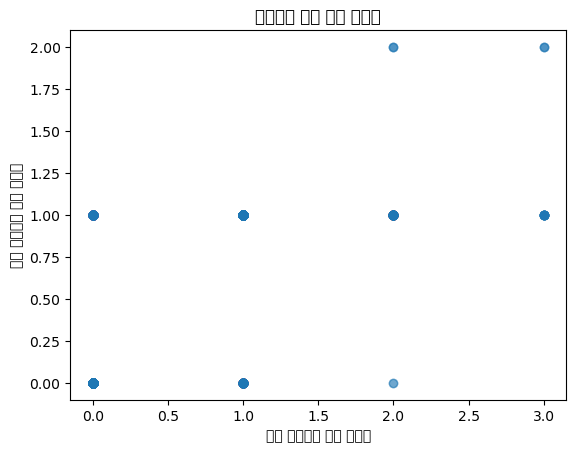

In [87]:
import matplotlib.pyplot as plt
plt.scatter(y_test, ppred, alpha=0.4)
plt.xlabel('실제 미세먼지 농도 데이터')
plt.ylabel('예상 미세먼지 농도 데이터')
plt.title('미세먼지 농도 예측 데이터')
plt.show()